# 10 Social Life
## 10.1 Key Insights
Practice makes perfect.  Those with active dating and social lives receieved the greatest positive feedback.

In [11]:
# libraries
%matplotlib inline

import os
import sys
import inspect

notebookdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
projdir = os.path.dirname(notebookdir)
srcdir = os.path.join(projdir,"src")
datadir = os.path.join(srcdir,"data")
sys.path.insert(0,notebookdir)
sys.path.insert(0,projdir)
sys.path.insert(0,srcdir)
sys.path.insert(0,datadir)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

import read
from shared import directories
sys.path.append(directories.ANALYSIS_DIR)
sys.path.append(directories.UTILITIES_DIR)
from analysis import trivariate

import univariate, bivariate, independence, visual, description
import warnings
warnings.filterwarnings('ignore')

## 10.2 Data

In [34]:
# Get Data
sd = read.read()
df = sd['all']
df_male = sd['male']
df_female = sd['female']
# Columns of interest
social = ['gender', 'date_label', 'go_out_label','dec','dec_o', 'yes_rate']

# Data containing independent and various dependent variables
df_social = df[social]
df_male_social = df_male[social]
df_female_social = df_female[social]

## 10.3 Univariate Analysis
The univariate analysis shows that we have 79 missing values. Interests ranged from 1 to 10, with a grand mean of 6.3.

,Several times a year,Twice a month,Once a month,Almost never,Once a week,Twice a week,Several times a week,missing
date_label,2094,2040,1528,1434,783,308,94,97


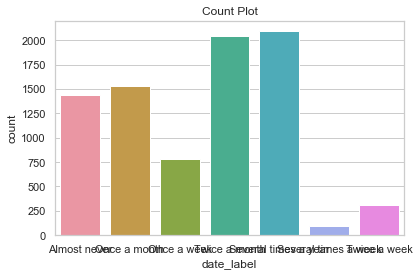

,Twice a week,Several times a week,Once a week,Twice a month,Once a month,Several times a year,Almost never,missing
go_out_label,2990,2610,1949,450,164,99,37,79


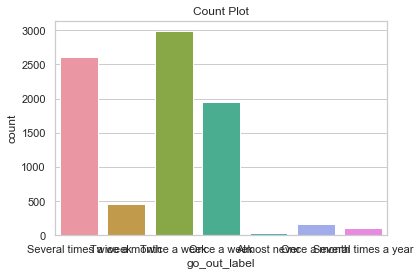

In [20]:
a = univariate.analysis(df_social)
for a in a:
    a['desc']
    a['plot']



## 10.4 Bivariate Analysis

### 10.4.1 Dating and Gender
The dating lives of the females and males were almost opposite.  Female dating lives could be characterized as in frequent.  Male dating lives would be characterized as active.
Top 5 for females:
- Almost Never
- Several Times a Year
- Twice a month
- Several times a year
- Twice - Week
- Once a month
- Once a week

Top 5 for males:
- Once a week
- Once a month
- Twice a week
- Several times per week
- Twice a month
- several times a year
- almost never


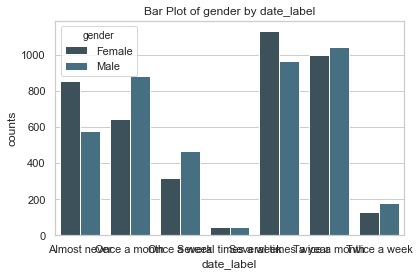

gender,Female,Male
date_label,,
Almost never,0.596234,0.403766
Several times a year,0.540115,0.459885
All,0.498128,0.501872
Twice a month,0.490196,0.509804
Several times a week,0.489362,0.510638
Twice a week,0.425325,0.574675
Once a month,0.422775,0.577225
Once a week,0.403576,0.596424


gender,Female,Male
date_label,,
Once a week,0.403576,0.596424
Once a month,0.422775,0.577225
Twice a week,0.425325,0.574675
Several times a week,0.489362,0.510638
Twice a month,0.490196,0.509804
All,0.498128,0.501872
Several times a year,0.540115,0.459885
Almost never,0.596234,0.403766


,x,y,p-Value,Cramer's V,Strength,Result
0,date_label,gender,1.129973e-27,0.09186,Very Weak Association,Significant


In [42]:
i, d, p = bivariate.analysis(x='date_label', y='gender', df=df[social])
p
d['pct'].sort_values(by='Female', ascending=False)
d['pct'].sort_values(by='Male', ascending=False)
i

### 10.4.1 Dating and Subject Decision 
Having an active dating life was associated with a positive decision on behalf of the subject. Most frequent yesses:
- Several Times a Week
- Twice a Week
- Once a week
- Twice a mont
- Several times a year
- Almost never
- Once a month

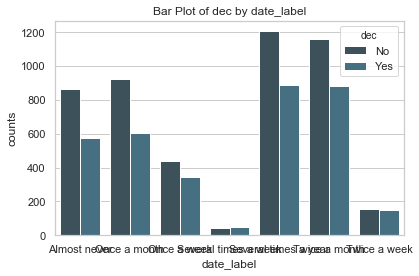

dec,No,Yes
date_label,,
Almost never,0.601116,0.398884
Once a month,0.604058,0.395942
Once a week,0.558110,0.441890
Several times a week,0.468085,0.531915
Several times a year,0.576409,0.423591
Twice a month,0.567647,0.432353
Twice a week,0.506494,0.493506
All,0.578070,0.421930


,x,y,p-Value,Cramer's V,Strength,Result
0,date_label,dec,0.00208,0.03535,Very Weak Association,Significant


In [25]:
i, d, p = bivariate.analysis(x='date_label', y='dec', df=df[social])
p
d['pct'].sort_values(by = 'Yes', ascending=False)
i

### 10.4.2 Dating and Partner Decision 
Similarly, those who were more active generally had better responses from the partners.


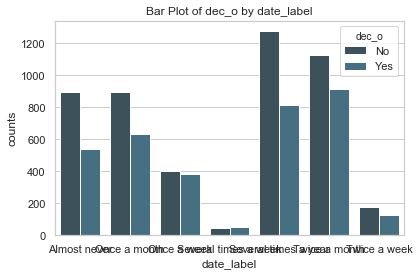

dec_o,No,Yes
date_label,,
Several times a week,0.468085,0.531915
Once a week,0.514687,0.485313
Twice a month,0.552941,0.447059
Twice a week,0.581169,0.418831
All,0.582176,0.417824
Once a month,0.586387,0.413613
Several times a year,0.609838,0.390162
Almost never,0.623431,0.376569


,x,y,p-Value,Cramer's V,Strength,Result
0,date_label,dec_o,8.902596e-08,0.051304,Very Weak Association,Significant


In [28]:
i, d, p = bivariate.analysis(x='date_label', y='dec_o', df=df[social])
p
d['pct'].sort_values(by = 'Yes', ascending=False)
i

### 10.4.3 Going Out and Subject Decision 
Significant result, but not easy to interpret.

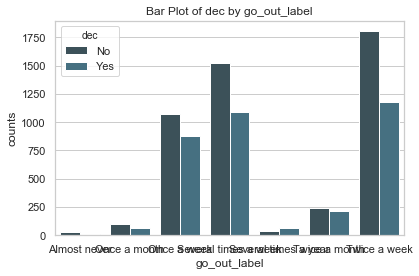

dec,No,Yes
go_out_label,,
Several times a year,0.353535,0.646465
Twice a month,0.528889,0.471111
Once a week,0.548999,0.451001
All,0.578865,0.421135
Several times a week,0.583525,0.416475
Twice a week,0.604348,0.395652
Once a month,0.628049,0.371951
Almost never,0.756757,0.243243


,x,y,p-Value,Cramer's V,Strength,Result
0,go_out_label,dec,1.881239e-08,0.053207,Very Weak Association,Significant


In [30]:
i, d, p = bivariate.analysis(x='go_out_label', y='dec', df=df[social])
p
d['pct'].sort_values(by = 'Yes', ascending=False)
i

### 10.4.4 Going Out and Partner Decision 
Clearly, active social life was associated with a greater number of yesses.  Practice makes perfect.

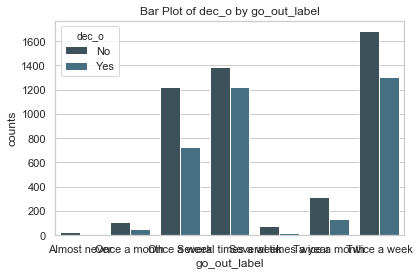

dec_o,No,Yes
go_out_label,,
Several times a week,0.532950,0.467050
Twice a week,0.563211,0.436789
All,0.581757,0.418243
Once a week,0.625962,0.374038
Once a month,0.676829,0.323171
Twice a month,0.695556,0.304444
Several times a year,0.797980,0.202020
Almost never,0.810811,0.189189


,x,y,p-Value,Cramer's V,Strength,Result
0,go_out_label,dec_o,7.635915e-20,0.078575,Very Weak Association,Significant


In [32]:
i, d, p = bivariate.analysis(x='go_out_label', y='dec_o', df=df[social])
p
d['pct'].sort_values(by = 'Yes', ascending=False)
i

## 10.5 Trivariate Analysis

### 10.5.1 Dating Life and Subject Decision by Gender
For males, those who made the most positive decisions were active daters. Females less so.

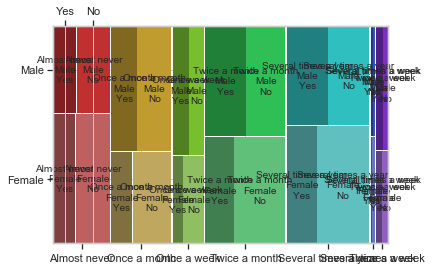

date_label Once a week Once a month Twice a month Several times a year  \
gender          Female       Female        Female               Female   
dec                                                                      
No            0.667722     0.647059         0.642             0.636605   
Yes           0.332278     0.352941         0.358             0.363395   

date_label Several times a week Almost never           Once a month  \
gender                   Female       Female      Male         Male   
dec                                                                   
No                     0.608696     0.608187  0.590674     0.572562   
Yes                    0.391304     0.391813  0.409326     0.427438   

date_label Twice a week Several times a year Twice a month Once a week  \
gender           Female                 Male          Male        Male   
dec                                                                      
No             0.557252             0.505711      0.496154     0.48394   
Yes            0.442748             0.494289      0.503846     0.51606   

date_label Twice a week Several times a week  
gender             Male                 Male  
dec                                           
No             0.468927             0.333333  
Yes            0.531073             0.666667

,x,y,z,p-Value,Cramer's V,Strength,Result
0,date_label,gender,dec,1.082453e-24,0.094025,Very Weak Association,Significant


In [43]:
i, d, p = trivariate.analysis(x='date_label', y='gender', z='dec', df=df_social)
p
d['pct'].sort_values(by='Yes', axis=1)
i

### 10.5.2 Dating Life and Partner Decision by Gender
The females that received the most positive decisions were relatively frequent daters. Practice makes perfect. Same with males.

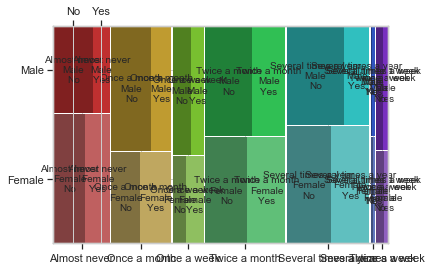

date_label,Almost never,Several times a year,Once a month,Twice a week,Twice a month,Once a week,Almost never,Several times a week,Twice a week,Several times a year,Twice a month,Once a month,Once a week,Several times a week
gender,Male,Male,Male,Female,Male,Male,Female,Female,Male,Female,Female,Female,Female,Male
dec_o,,,,,,,,,,,,,,
No,0.704663,0.693666,0.666667,0.625954,0.581731,0.573876,0.568421,0.565217,0.548023,0.538462,0.523,0.47678,0.427215,0.375
Yes,0.295337,0.306334,0.333333,0.374046,0.418269,0.426124,0.431579,0.434783,0.451977,0.461538,0.477,0.52322,0.572785,0.625


,x,y,z,p-Value,Cramer's V,Strength,Result
0,date_label,gender,dec_o,8.046493e-37,0.111522,Very Weak Association,Significant


In [44]:
i, d, p = trivariate.analysis(x='date_label', y='gender', z='dec_o', df=df_social)
p
d['pct'].sort_values(by='Yes', axis=1)
i

### 10.5.3 Social Life and Subject Decision by Gender
Females receiving the greatest feedback ranged from sevearl times a yaer to almost never.  Almost opposite for males

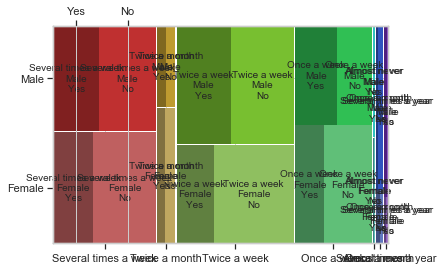

go_out_label Almost never Twice a week Once a month Once a week  \
gender               Male       Female         Male      Female   
dec                                                               
No                    1.0     0.683554     0.669355     0.62771   
Yes                   0.0     0.316446     0.330645     0.37229   

go_out_label Several times a week          Twice a month Twice a week  \
gender                     Female     Male        Female         Male   
dec                                                                     
No                       0.613264  0.55205      0.544484     0.538084   
Yes                      0.386736  0.44795      0.455516     0.461916   

go_out_label Twice a month Almost never Once a month Several times a year  \
gender                Male       Female       Female               Female   
dec                                                                         
No                0.502959          0.5          0.5              0.47619   
Yes               0.497041          0.5          0.5              0.52381   

go_out_label Once a week Several times a year  
gender              Male                 Male  
dec                                            
No              0.454955             0.320513  
Yes             0.545045             0.679487

,x,y,z,p-Value,Cramer's V,Strength,Result
0,go_out_label,gender,dec,9.079014e-35,0.108666,Very Weak Association,Significant


In [46]:
i, d, p = trivariate.analysis(x='go_out_label', y='gender', z='dec', df=df_social)
p
d['pct'].sort_values(by='Yes', axis=1)
i

### 10.5.4 Social Life and Partner Decision by Gender
Similarly, active social life was associated with greater rate of positive decisions by subject

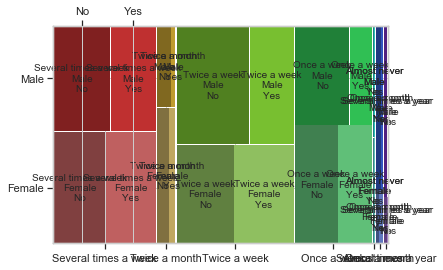

go_out_label,Almost never,Several times a year,Twice a month,Almost never,Several times a year,Once a month,Once a week,Twice a month,Twice a week,Several times a week,Once a week,Several times a week,Twice a week,Once a month
gender,Female,Male,Male,Male,Female,Male,Male,Female,Male,Male,Female,Female,Female,Female
dec_o,,,,,,,,,,,,,,
No,0.833333,0.807692,0.792899,0.789474,0.761905,0.75,0.710586,0.637011,0.624079,0.557571,0.555137,0.509687,0.490455,0.45
Yes,0.166667,0.192308,0.207101,0.210526,0.238095,0.25,0.289414,0.362989,0.375921,0.442429,0.444863,0.490313,0.509545,0.55


,x,y,z,p-Value,Cramer's V,Strength,Result
0,go_out_label,gender,dec_o,2.153360e-42,0.118479,Very Weak Association,Significant


In [47]:
i, d, p = trivariate.analysis(x='go_out_label', y='gender', z='dec_o', df=df_social)
p
d['pct'].sort_values(by='Yes', axis=1)
i